In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as torch_datasets

from jaxl.datasets.omniglot import MultitaskOmniglotBursty, MultitaskOmniglotNWayKShot, MultitaskOmniglotBurstyAllSplit
from jaxl.datasets.wrappers import ContextDataset, FixedLengthContextDataset

import jaxl.transforms as jaxl_transforms

In [2]:
# dataset = ContextDataset(
#     MultitaskOmniglotBursty(
#         dataset=torch_datasets.Omniglot(
#             "/home/bryanpu1/projects/icl/data",
#             background=True,
#             download=False,
#             transform=jaxl_transforms.DefaultPILToImageTransform(),
#             target_transform=None,
#         ),
#         num_sequences=20,
#         sequence_length=16,
#         p_bursty=0.5,
#         min_num_per_class=1,
#     ),
#     context_len=15,
#     include_query_class=False,
# )

# dataset = FixedLengthContextDataset(
#     MultitaskOmniglotBursty(
#         dataset=torch_datasets.Omniglot(
#             "/home/bryanpu1/projects/icl/data",
#             background=True,
#             download=False,
#             transform=jaxl_transforms.DefaultPILToImageTransform(),
#             target_transform=None,
#         ),
#         num_sequences=20,
#         sequence_length=16,
#         p_bursty=0.5,
#         min_num_per_class=3,
#     ),
#     context_len=15,
# )

# dataset = FixedLengthContextDataset(
#     MultitaskOmniglotNWayKShot(
#         dataset=torch_datasets.Omniglot(
#             "/home/bryanpu1/projects/icl/data",
#             background=True,
#             download=False,
#             transform=jaxl_transforms.DefaultPILToImageTransform(),
#             target_transform=None,
#         ),
#         num_sequences=20,
#         sequence_length=9,
#         k_way=4
#     ),
#     context_len=8,
# )

dataset = FixedLengthContextDataset(
    MultitaskOmniglotBurstyAllSplit(
        train_dataset=torch_datasets.Omniglot(
            "/home/bryanpu1/projects/icl/data",
            background=True,
            download=False,
            transform=jaxl_transforms.DefaultPILToImageTransform(),
            target_transform=None,
        ),
        test_dataset=torch_datasets.Omniglot(
            "/home/bryanpu1/projects/icl/data",
            background=False,
            download=False,
            transform=jaxl_transforms.DefaultPILToImageTransform(),
            target_transform=None,
        ),
        num_holdout=10,
        train=True,
        num_sequences=20,
        sequence_length=16,
        p_bursty=0.5,
        min_num_per_class=3,
    ),
    context_len=15,
)

Generating Data


In [3]:
ci, co, q, o = dataset[0]

In [4]:
q.shape

(1, 1, 105, 105)

In [5]:
ci_2, co_2, q_2, o_2 = dataset[0]

In [6]:
print(np.allclose(ci, ci_2))
print(np.allclose(co, co_2))
print(np.allclose(q, q_2))
print(np.allclose(o, o_2))

True
True
True
True


In [7]:
np.argmax(o, axis=-1), np.argmax(co, axis=-1)

(1618,
 array([1620, 1618, 1620, 1620, 1616, 1618, 1620, 1618, 1616, 1617, 1618,
        1622, 1615, 1616, 1613]))

In [8]:
ci_2, co_2, q_2, o_2 = dataset[4]

In [9]:
np.argmax(o_2, axis=-1), np.argmax(co_2, axis=-1)

(1620,
 array([1618, 1614, 1621, 1620, 1621, 1615, 1622, 1620, 1620, 1620, 1622,
        1621, 1617, 1615, 1619]))

In [10]:
ci.shape, co.shape, q.shape, o.shape

((15, 1, 105, 105), (15, 1623), (1, 1, 105, 105), (1623,))

In [11]:
# dataset._data["is_bursty"]

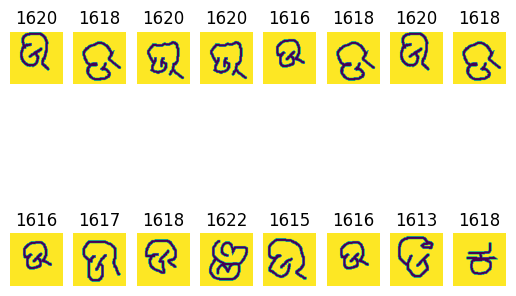

In [12]:
fig, ax = plt.subplots(2, 8)

for idx, (img, output) in enumerate(zip(ci, co)):
    row_i = idx // 8
    col_i = idx % 8
    ax[row_i, col_i].imshow(img[0])
    ax[row_i, col_i].set_title(np.argmax(output))
    ax[row_i, col_i].axis('off')
ax[0, -1].axis('off')
ax[1, -1].axis('off')
ax[1, -1].imshow(q[0, 0])
ax[1, -1].set_title(np.argmax(o, axis=-1))
plt.show()

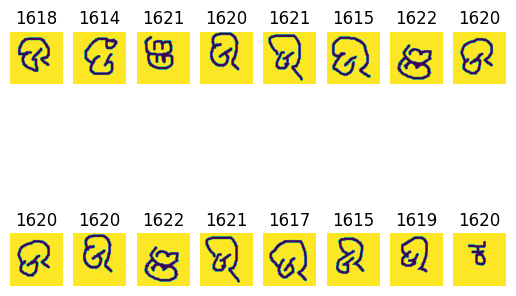

In [13]:
fig, ax = plt.subplots(2, 8)

for idx, (img, output) in enumerate(zip(ci_2, co_2)):
    row_i = idx // 8
    col_i = idx % 8
    ax[row_i, col_i].imshow(img[0])
    ax[row_i, col_i].set_title(np.argmax(output))
    ax[row_i, col_i].axis('off')
ax[0, -1].axis('off')
ax[1, -1].axis('off')
ax[1, -1].imshow(q_2[0, 0])
ax[1, -1].set_title(np.argmax(o_2, axis=-1))
plt.show()

In [14]:
print(len(dataset))
# print(dataset._data["is_bursty"])

20


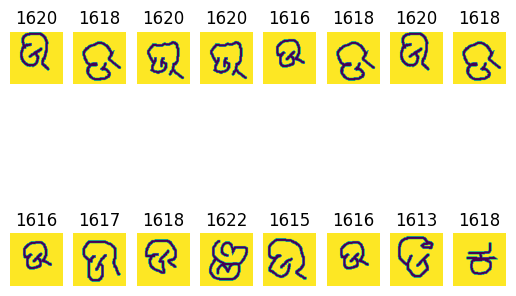

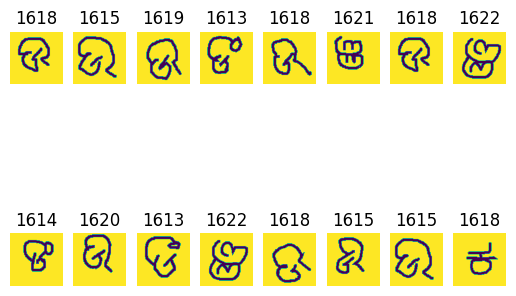

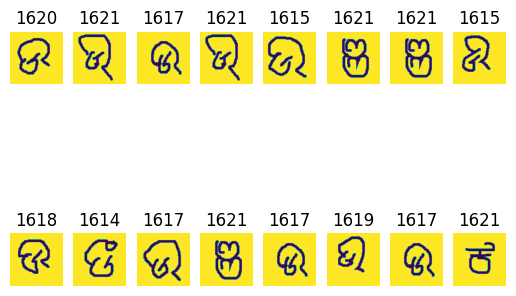

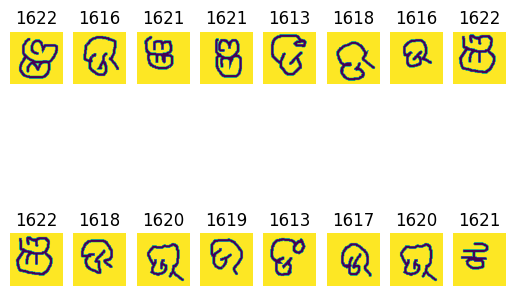

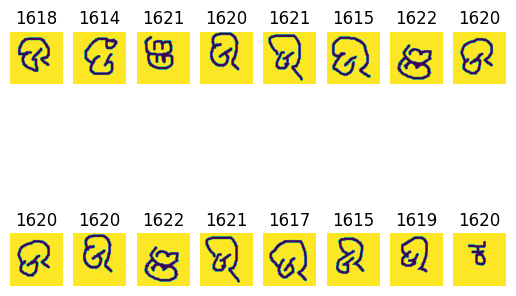

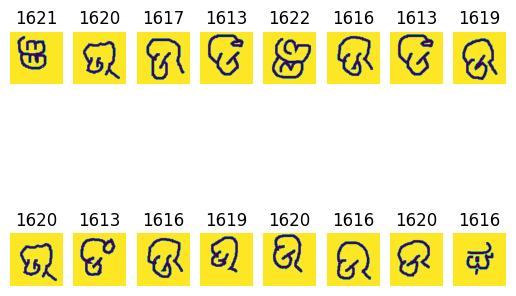

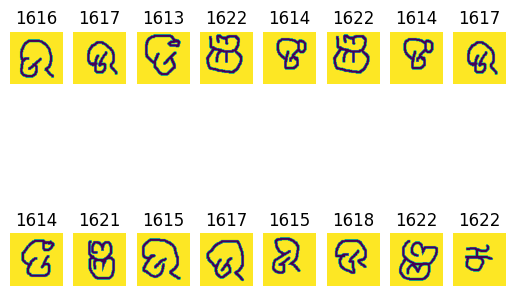

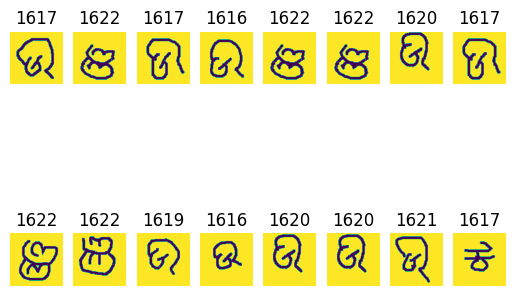

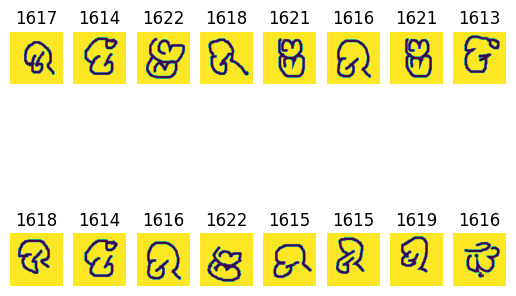

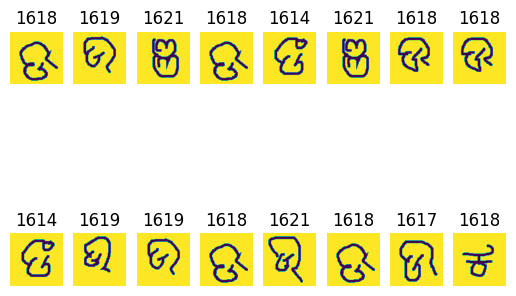

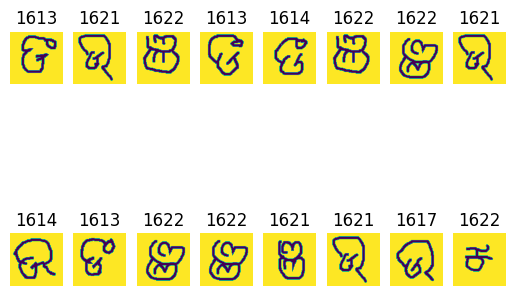

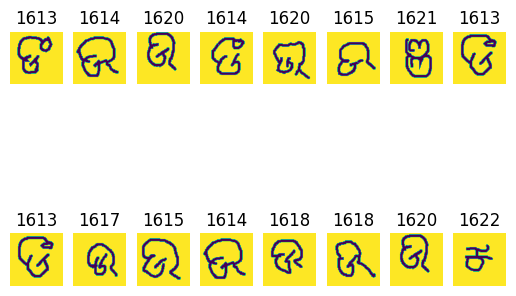

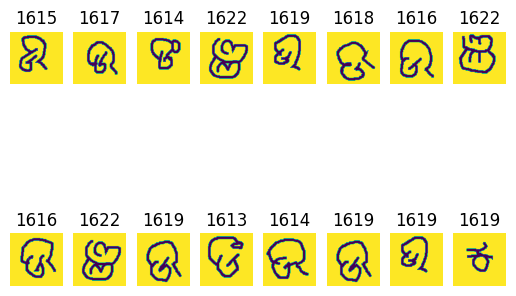

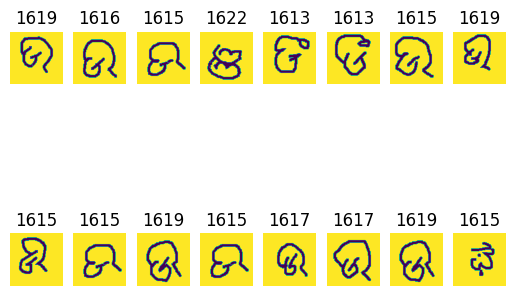

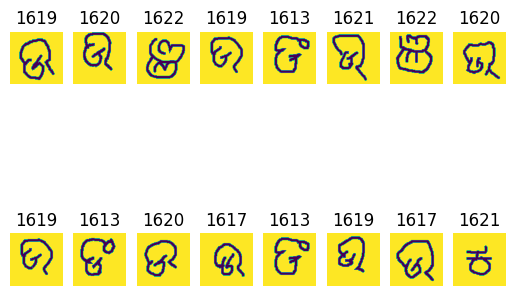

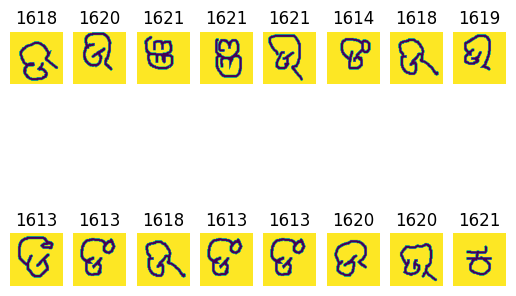

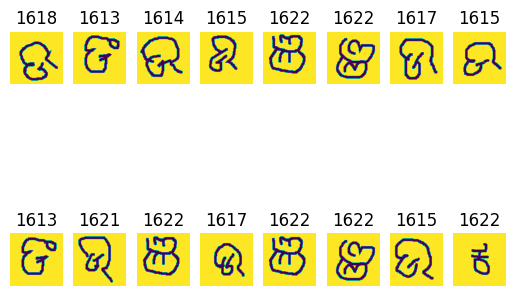

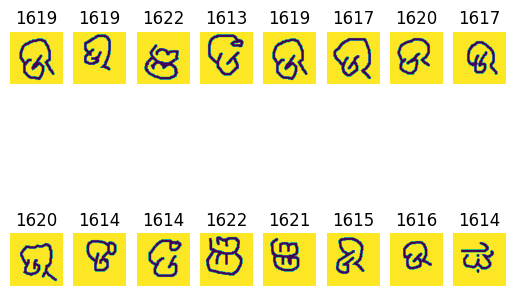

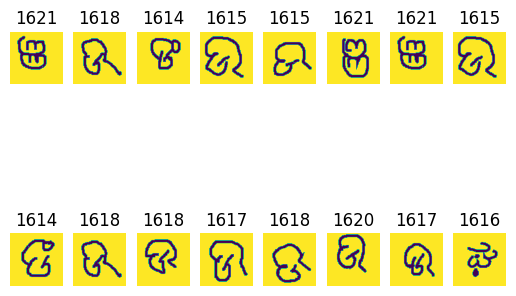

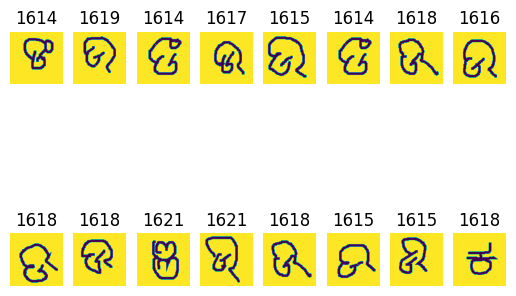

In [15]:
for ii in range(len(dataset)):
    ci, co, q, o = dataset[ii]

    fig, ax = plt.subplots(2, 8)

    for idx, (img, output) in enumerate(zip(ci, co)):
        row_i = idx // 8
        col_i = idx % 8
        ax[row_i, col_i].imshow(img[0])
        ax[row_i, col_i].set_title(np.argmax(output))
        ax[row_i, col_i].axis('off')
    ax[0, -1].axis('off')
    ax[1, -1].axis('off')
    ax[1, -1].imshow(q[0, 0])
    ax[1, -1].set_title(np.argmax(o, axis=-1))
    plt.show()

    if ii >= 30:
        break